<a href="https://colab.research.google.com/github/rudrakant22sep/EVA/blob/Session_3/RudraKant_BatchW6_Assignment3__1st_DNN___RESUBMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


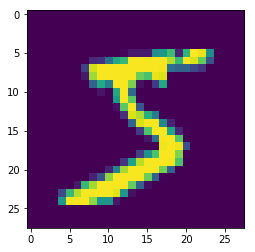

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# from keras.layers import Activation
# model = Sequential()

# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Conv Layer 1
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# Trans Layer 1
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, 1, activation='relu'))


# Conv Layer 2
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# Trans Layer 2
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, 1, activation='relu'))



# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))
##

In [0]:
from keras.layers import Activation
model = Sequential()
droprate=0.11


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#Receptive field  (3 X 3)
#Input shape (28 X 28 X 1) 
#output shape (26 X 26 X 32)
model.add(BatchNormalization())
model.add(Dropout(droprate))

#Receptive field  (5 X 5)
#Input shape (26 X 26 X 32)
#output shape (24 X 24 X 16)
model.add(Convolution2D(16,3,3))
model.add(BatchNormalization())
model.add(Dropout(droprate))

#Input (24 X 24 X 16)
model.add(MaxPooling2D(2,2))
# Receptive field  (10 X 10)
# Output (12 X 12 X 16)

# Input (12 x 12 x 16)

model.add(Convolution2D(16,3))
model.add(BatchNormalization())
model.add(Dropout(droprate))
# Receptive field (12 x 12)
# Output (10 x 10 x 16)

#Input (10 x 10 x 16)
model.add(Convolution2D(16,3))
model.add(BatchNormalization())
model.add(Dropout(droprate))
# Receptive field (14 x 14)
# Output (8 x 8 x 16)


#  Intput (8 x 8 x 16)
model.add(Convolution2D(16,3))
model.add(BatchNormalization())
model.add(Dropout(droprate))
# Receptive field (16 x 16)
# Output (6 x 6 x 16)


model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.1806 - acc: 0.9448
Epoch 2/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0691 - acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0573 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0511 - acc: 0.9842
Epoch 5/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0475 - acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0444 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0416 - acc: 0.9866
Epoch 8/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0391 - acc: 0.9877
Epoch 9/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0376 - acc: 0.9878
Epoch 10/10
60000/60000 [==============================] - 18s 306us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04314294035276398, 0.9865]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.7840305e-10 3.0951466e-07 1.0411588e-06 4.6767957e-07 8.7816724e-14
  1.6412556e-09 3.1599313e-12 9.9999797e-01 2.0568089e-10 2.0051996e-07]
 [8.7131163e-10 1.7297898e-04 9.9981850e-01 1.8911444e-07 2.5756119e-10
  1.9474027e-10 8.3514960e-06 8.0843290e-11 5.0402287e-09 7.8816162e-11]
 [1.0176200e-10 9.9999654e-01 1.6037559e-06 1.0899925e-07 2.1000760e-07
  7.8597270e-07 4.0985009e-07 1.2706799e-07 1.9726374e-07 4.4732346e-08]
 [9.9983454e-01 1.3361428e-07 1.1460824e-05 5.1508312e-07 2.6831095e-09
  1.2269015e-06 1.5016852e-04 2.4635982e-08 3.3548403e-07 1.7310998e-06]
 [3.3786151e-07 3.0828403e-05 3.9613184e-07 1.4874139e-09 9.9946827e-01
  7.8025346e-07 7.3803836e-05 8.0474237e-08 2.4621629e-06 4.2297633e-04]
 [5.1988097e-10 9.9998963e-01 6.3213638e-06 8.2948848e-09 1.7054657e-06
  3.7957502e-08 4.7674922e-07 1.5399474e-06 9.0166822e-08 1.8480999e-07]
 [1.3415328e-09 7.2966935e-04 3.2814489e-07 3.4137619e-07 9.9657452e-01
  7.9246138e-06 3.0395086e-08 1.3404417e-04 7.1070821e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored